In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading data and cleaning

In [3]:
candidate = pd.read_csv("../data/raw/HR-Employee-Attrition.csv")
candidate.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
candidate.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Creating succes column 

In [5]:
filter_1 = candidate['Attrition'] == 'No'
filter_2 = candidate['YearsAtCompany'] >= 2
filter_3 = candidate['WorkLifeBalance'] >= 3
filter_4 = candidate['RelationshipSatisfaction']

In [6]:
candidate['success'] = (filter_1 & filter_2 & filter_3 & filter_4).astype(int)

candidate['success'].value_counts()

success
0    1091
1     379
Name: count, dtype: int64

In [7]:
candidate.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,success
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


Explatroy Data Analysis

In [8]:
candidate['success'].value_counts(normalize = True)*100

success
0    74.217687
1    25.782313
Name: proportion, dtype: float64

Correlation Analysis

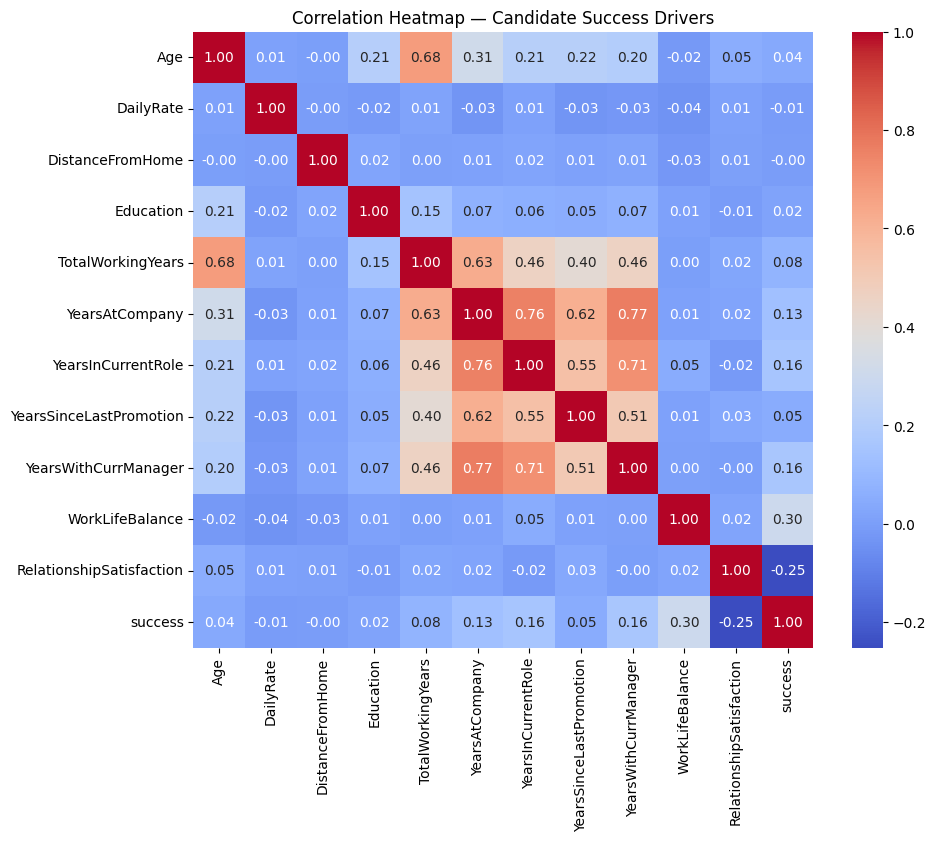

In [ ]:
num_columns = ['Age','DailyRate','DistanceFromHome','Education',
    'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
    'YearsSinceLastPromotion','YearsWithCurrManager',
    'WorkLifeBalance','RelationshipSatisfaction','success'
]

corr = candidate[num_columns].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt='.2f', cmap = 'coolwarm')
plt.title("Correlation Heatmap — Candidate Success Drivers")
plt.show()

Correlation Analysis – Candidate Success Drivers

The strongest positive predictor of long-term candidate success is WorkLifeBalance (0.30), exceeding traditional experience metrics. Stability indicators such as YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager form a strong retention cluster (correlation > 0.75), highlighting the importance of early-role alignment.

Interestingly, RelationshipSatisfaction shows a negative correlation with success (-0.25), suggesting that satisfaction alone is not sufficient to ensure long-term retention and may mask underlying role mismatch.

These insights indicate that behavioral and stability metrics are stronger predictors of hiring success than experience alone.

Experience Distribution

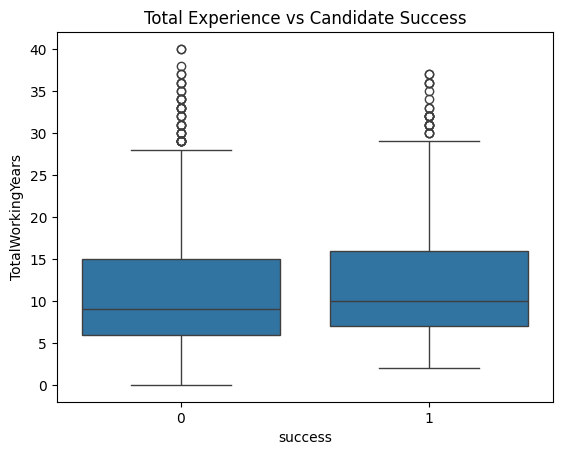

In [ ]:
plt.figure()
sns.boxplot(x='success', y='TotalWorkingYears', data=candidate)
plt.title("Total Experience vs Candidate Success")
plt.show()


Experience Distribution Analysis

Boxplot analysis of TotalWorkingYears reveals substantial overlap between successful and unsuccessful candidates, indicating that prior experience alone is not a reliable predictor of long-term hiring success. This reinforces the importance of incorporating stability and behavioral metrics into predictive hiring models.

Retention Stability Cluster

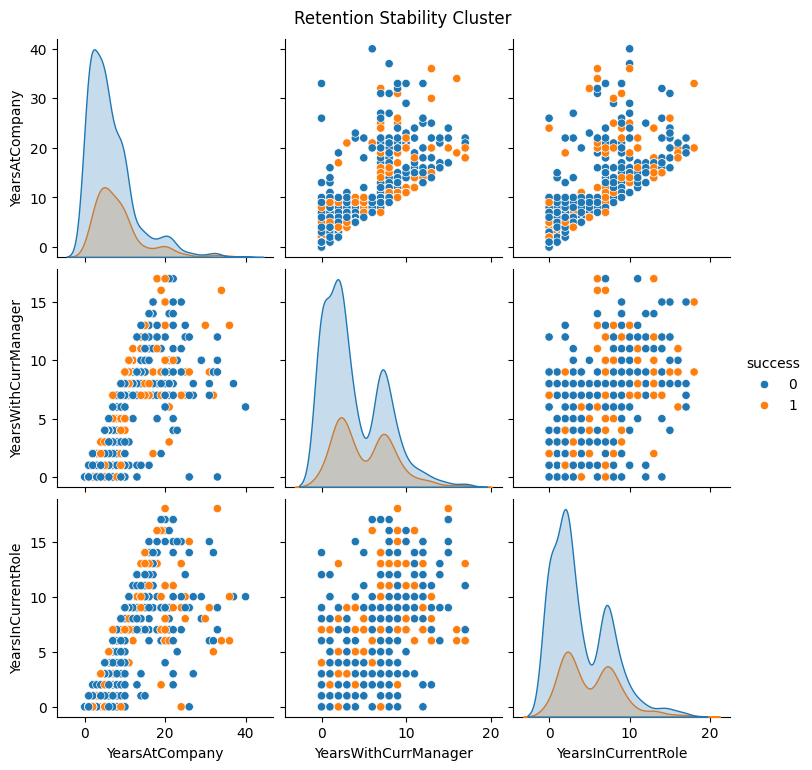

In [36]:
sns.pairplot(vars=['YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole'], hue = 'success', data = candidate)
plt.suptitle("Retention Stability Cluster", y=1.02)
plt.show()

Retention Stability Cluster Analysis

Pairwise analysis of YearsAtCompany, YearsWithCurrManager, and YearsInCurrentRole reveals a strong stability cluster among successful candidates. Employees who stabilize early with both their role and manager exhibit significantly higher long-term success rates, while early-fail employees cluster in low-tenure, high-rotation regions.

This demonstrates that hiring success is not driven by experience alone but by early-role alignment and managerial continuity.

Work-Life Balance

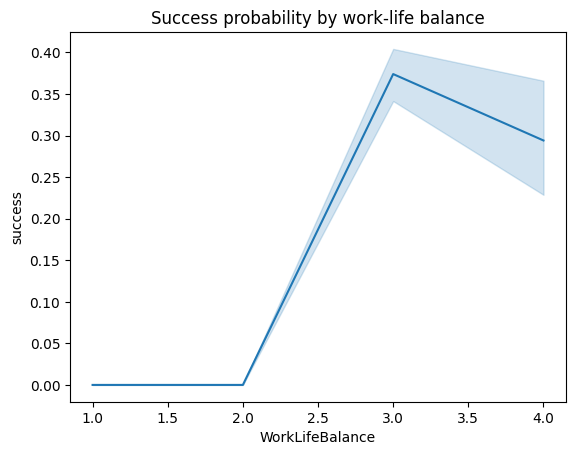

In [17]:
plt.figure()
sns.lineplot(x = 'WorkLifeBalance', y = 'success', data = candidate, estimator= 'mean')
plt.title("Success probability by work-life balance")
plt.show()

Work-Life Balance Impact Analysis

Candidate success probability exhibits a strong threshold effect with respect to WorkLifeBalance. Employees scoring below 3 show near-zero probability of long-term success, while those scoring 3 or higher demonstrate a dramatic increase in retention likelihood. This indicates that work-life balance is not a linear predictor but a minimum viability requirement for sustainable hiring.


Manger effect in success

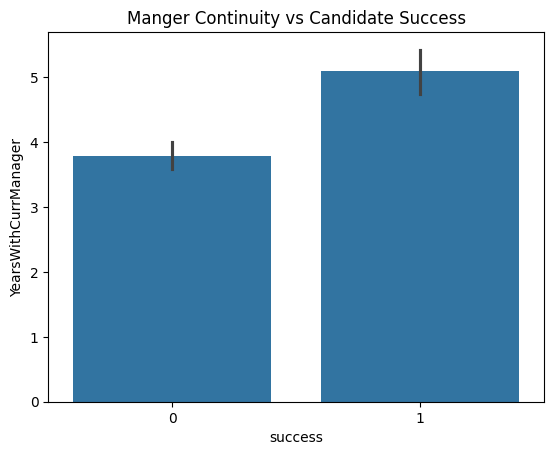

In [21]:
plt.figure()
sns.barplot(x = 'success', y = 'YearsWithCurrManager', data = candidate)
plt.title("Manger Continuity vs Candidate Success")
plt.show()

Manager Continuity Analysis

Successful candidates remain with their initial manager for an average of 5.1 years compared to only 3.7 years for unsuccessful hires. This 38% increase highlights manager-candidate compatibility as a critical factor in long-term retention and performance.

Early exit detection window

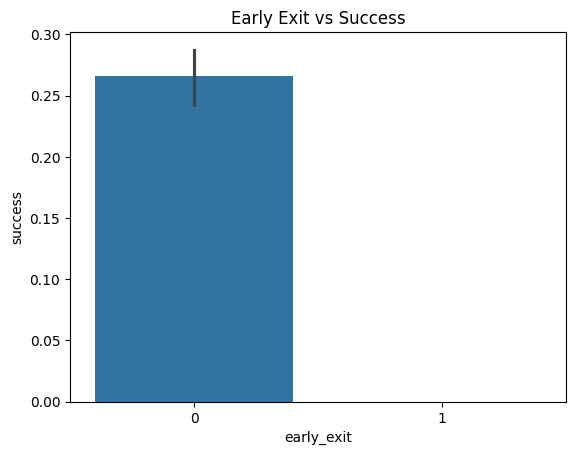

In [24]:
candidate['early_exit'] = (candidate['YearsAtCompany'] < 1).astype(int)

plt.figure()
sns.barplot(x = 'early_exit', y = 'success', data = candidate)
plt.title("Early Exit vs Success")
plt.show()

Early Exit Risk Analysis

Employees who exit within their first year exhibit near-zero probability of long-term success. This identifies the probation period as a critical intervention window where early support and engagement programs could drastically improve retention outcomes.

Expirence vs stability

<Figure size 640x480 with 0 Axes>

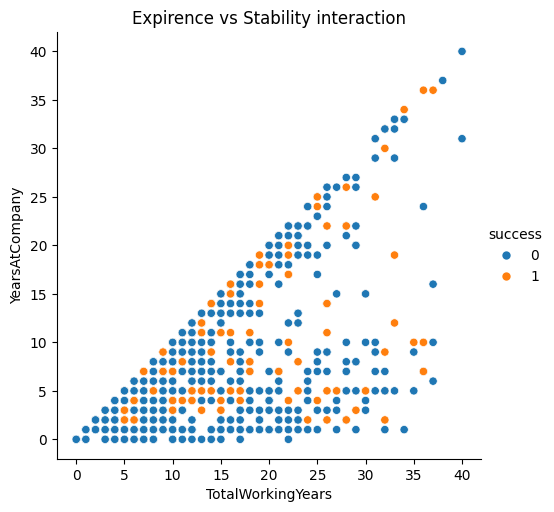

In [29]:
plt.figure()
sns.relplot(x = 'TotalWorkingYears', y = 'YearsAtCompany', hue = 'success', data =candidate)
plt.title('Expirence vs Stability interaction')
plt.show()

Experience vs Stability Interaction

Scatter analysis shows that high total experience does not guarantee long-term success unless candidates stabilize early within the organization. Employees with significant prior experience but low early tenure exhibit high failure rates, while those who convert experience into early stability demonstrate markedly higher success probabilities.